In [1]:
#loading the data

# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\sande\anaconda3\envs\my_learnings\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#box plot are really good at comparing values. For examplr we can see the distribution of the salaries between different roels. 

# General
# boxplot(): plot a box plot
# Common Parameters:
# column - column(s) to plot
# by - if specified, data will be grouped and a box plot for each group will be plotted
# vert - if False, plots horizontal boxplots
# Syntax: boxplot(column=['column1', 'column2', ...], by=None, vert=False)


In [3]:
# General Info
# Purpose:
# Visualize the distribution of a dataset by displaying the summary statistics (minimum, first quartile, median, third quartile, and maximum).
# Identify outliers and skewness in the data.
# Compare distributions across multiple groups.


In [4]:
#THis is also called BOX AND WHISKERS PLOT


In [5]:
#simple example lets see the yearly salary distribution for data analyst

#for this we will filter our df just to have data analyst job postings and we will also going to do for US 

#lets do it

Df_US_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

Df_US_DA = Df_US_DA.dropna(subset=['salary_year_avg'])

Df_US_DA



,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


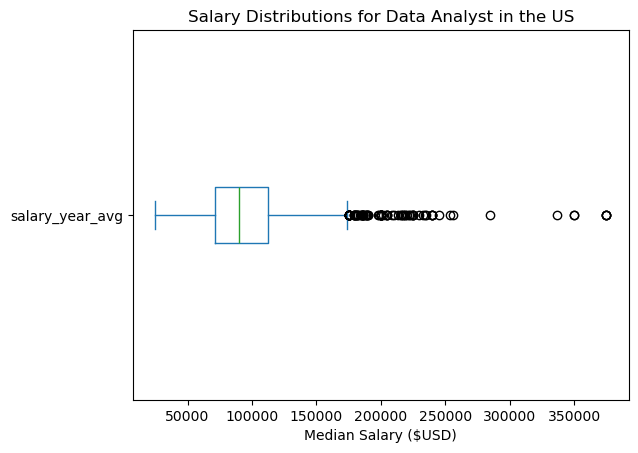

In [6]:
#now we just need the coloumn of interest and use pandas .plot(kind= 'box') done.

Df_US_DA['salary_year_avg'].plot(kind='box',vert=False) #vert is to make horizonatal box plot
plt.title('Salary Distributions for Data Analyst in the US')
plt.xlabel('Median Salary ($USD)')
plt.ylabel('')
plt.show()


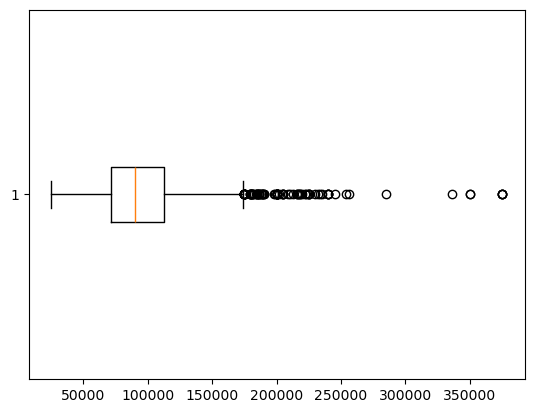

In [7]:
#we can also plot this in matlab way of plotting

plt.boxplot(Df_US_DA['salary_year_avg'], vert=False)
plt.show()


C:\Users\sande\AppData\Local\Temp\ipykernel_18204\113786997.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_entry, labels= job_list, vert=False) #here, we have gave our list comprehension


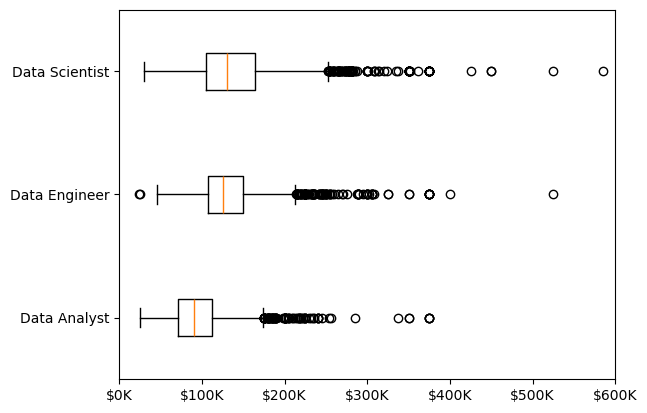

In [8]:
#we want to plot avg yearly salaries of the data anlayst, data scientist, data engineer and also want to see median and outliers 
#why I prefer median in this case not avg because the datA IS rightly skweed and we migh grt higher avg salary than in real so median would be 
#great for this.

job_list = ['Data Analyst', 'Data Engineer','Data Scientist']

Df_US = df[(df['job_title_short'].isin(job_list)) & (df['job_country'] == 'United States')].copy()  #isin is method which will compare the job_list 
#to df[job_title_short] coloumn and will only return those rows which has job_list values.

#to remove NaN val
Df_US = Df_US.dropna(subset=['salary_year_avg'])

job_entry =  [Df_US[Df_US['job_title_short'] == x]['salary_year_avg'] for x in job_list]  #why we created list comprehension?
#so we can provide a list of the all three job roels avg salary for ploting the box plot.

#we have created the list comprehension and stored in the job entry variable. we will have all the avg salary in it because we have filtered it for 
#the job_list we have. we are only interested in salary year so we used inside [] salary year avg right beside the filteration. 
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter (lambda x, pos: f'${int(x/1000)}K')) #to change x axis 
plt.boxplot(job_entry, labels= job_list, vert=False) #here, we have gave our list comprehension 
plt.xlim(0,600000)
plt.show()
